In [ ]:
import warnings
warnings.filterwarnings("ignore")

import mlflow
import numpy as np

from utils.evaluate_v2 import compare_result, calculate_diff

mlflow.set_tracking_uri("/Users/pongpanod.san.adm/Desktop/Pongpanod.san/chula/pun_master_thesis/mlruns")

In [ ]:
query_list = []
n = 128
query_list.append({"augment_name":"short_time_fourier_transform", "augment_params":{"nperseg": n, "noverlap_ratio": 0.1}, "concat_original": False})
query_list.append({"augment_name":"short_time_fourier_transform", "augment_params":{"nperseg": n, "noverlap_ratio": 0.3}, "concat_original": False})
query_list.append({"augment_name":"short_time_fourier_transform", "augment_params":{"nperseg": n, "noverlap_ratio": 0.5}, "concat_original": False})
query_list.append({"augment_name":"short_time_fourier_transform", "augment_params":{"nperseg": n, "noverlap_ratio": 0.7}, "concat_original": False})
query_list.append({"augment_name":"short_time_fourier_transform", "augment_params":{"nperseg": n, "noverlap_ratio": 0.9}, "concat_original": False})


df = compare_result(query_list, 'minirocket',['baseline'], 0.0)
df

192
170
170
170
170
[]


,Adiac,ArrowHead,Beef,BeetleFly,BirdChicken,CBF,Car,ChlorineConcentration,CinCECGTorso,Coffee,Computers,CricketX,CricketY,CricketZ,DiatomSizeReduction,DistalPhalanxOutlineAgeGroup,DistalPhalanxOutlineCorrect,DistalPhalanxTW,ECG200,ECG5000,ECGFiveDays,Earthquakes,ElectricDevices,FaceAll,FaceFour,FacesUCR,FiftyWords,Fish,FordA,FordB,GunPoint,Ham,HandOutlines,Haptics,Herring,InlineSkate,InsectWingbeatSound,ItalyPowerDemand,LargeKitchenAppliances,Lightning2,Lightning7,Mallat,Meat,MedicalImages,MiddlePhalanxOutlineAgeGroup,MiddlePhalanxOutlineCorrect,MiddlePhalanxTW,MoteStrain,NonInvasiveFetalECGThorax1,NonInvasiveFetalECGThorax2,OSULeaf,OliveOil,PhalangesOutlinesCorrect,Phoneme,Plane,ProximalPhalanxOutlineAgeGroup,ProximalPhalanxOutlineCorrect,ProximalPhalanxTW,RefrigerationDevices,ScreenType,ShapeletSim,ShapesAll,SmallKitchenAppliances,SonyAIBORobotSurface1,SonyAIBORobotSurface2,StarLightCurves,Strawberry,SwedishLeaf,Symbols,SyntheticControl,ToeSegmentation1,ToeSegmentation2,Trace,TwoLeadECG,TwoPatterns,UWaveGestureLibraryAll,UWaveGestureLibraryX,UWaveGestureLibraryY,UWaveGestureLibraryZ,Wafer,Wine,WordSynonyms,Worms,WormsTwoClass,Yoga
"{'nperseg': 64, 'noverlap_ratio': 0.1}",0.688000,0.777000,0.733000,0.700000,0.850000,0.750000,0.817000,0.736000,0.996000,1.000000,0.716000,0.646000,0.618000,0.610000,0.918000,0.741000,0.783000,0.676000,0.880000,0.942000,0.967000,0.770000,0.637000,0.872000,0.932000,0.874000,0.666000,0.926000,0.965000,0.795000,0.960000,0.733000,0.911000,0.458000,0.688000,0.493000,0.555000,0.959000,0.661000,0.787000,0.753000,0.984000,0.917000,0.759000,0.578000,0.801000,0.526000,0.759000,0.908000,0.936000,0.806000,0.900000,0.822000,0.401000,1.000000,0.873000,0.893000,0.805000,0.507000,0.464000,0.850000,0.758000,0.779000,0.884000,0.927000,0.975000,0.968000,0.939000,0.914000,0.660000,0.820000,0.723000,1.000000,0.794000,0.308000,0.789000,0.599000,0.601000,0.609000,0.997000,0.648000,0.542000,0.753000,0.727000,0.833000
"{'nperseg': 64, 'noverlap_ratio': 0.3}",0.803000,0.709000,0.767000,0.750000,0.750000,0.766000,0.883000,0.754000,0.994000,1.000000,0.680000,0.603000,0.659000,0.641000,0.941000,0.748000,0.764000,0.698000,0.890000,0.940000,0.863000,0.719000,0.662000,0.749000,0.932000,0.890000,0.664000,0.949000,0.973000,0.800000,0.973000,0.581000,0.900000,0.471000,0.688000,0.500000,0.550000,0.965000,0.739000,0.787000,0.671000,0.988000,0.933000,0.774000,0.565000,0.818000,0.539000,0.652000,0.919000,0.937000,0.818000,0.900000,0.819000,0.408000,1.000000,0.859000,0.880000,0.780000,0.515000,0.440000,0.867000,0.807000,0.824000,0.935000,0.944000,0.979000,0.970000,0.934000,0.903000,0.687000,0.772000,0.831000,1.000000,0.911000,0.361000,0.817000,0.615000,0.643000,0.629000,0.996000,0.648000,0.583000,0.818000,0.870000,0.841000
"{'nperseg': 64, 'noverlap_ratio': 0.5}",0.788000,0.817000,0.733000,0.750000,0.750000,0.874000,0.833000,0.759000,0.999000,0.964000,0.732000,0.677000,0.697000,0.685000,0.948000,0.734000,0.761000,0.698000,0.870000,0.947000,0.972000,0.748000,0.667000,0.843000,0.920000,0.914000,0.701000,0.926000,0.983000,0.835000,0.967000,0.619000,0.930000,0.481000,0.594000,0.569000,0.570000,0.947000,0.752000,0.787000,0.726000,0.979000,0.933000,0.791000,0.532000,0.859000,0.539000,0.669000,0.929000,0.950000,0.864000,0.900000,0.818000,0.407000,1.000000,0.868000,0.907000,0.815000,0.533000,0.512000,0.811000,0.838000,0.840000,0.892000,0.920000,0.978000,0.973000,0.973000,0.936000,0.677000,0.842000,0.831000,0.990000,0.987000,0.396000,0.852000,0.635000,0.651000,0.649000,0.994000,0.537000,0.627000,0.805000,0.805000,0.859000
"{'nperseg': 64, 'noverlap_ratio': 0.7}",0.783000,0.800000,0.733000,0.850000,0.750000,0.939000,0.867000,0.763000,0.999000,1.000000,0.716000,0.723000,0.762000,0.751000,0.935000,0.770000,0.779000,0.691000,0.870000,0.944000,0.950000,0.734000,0.670000,0.828000,0.909000,0.914000,0.765000,0.960000,0.982000,0.828000,0.980000,0.610000,0.932000,0.500000,0.656000,0.549000,0.571000,0.960000,0.821000,0.770000,0.767000,0.988000,0.917000,0.8

In [20]:
from sktime.datasets import load_UCR_UEA_dataset

x_train, y_train = load_UCR_UEA_dataset(
    'BeetleFly', split="train", return_X_y=True, return_type="numpy2D"
)
series = x_train[0]

In [24]:


result = fourier_transform(x_train, 5, 8)

In [26]:
result.shape

(20, 8)

In [23]:
result

array([7.5494508 , 0.92072177, 0.47131428, 0.29984861, 0.31397138,
       0.29984861, 0.47131428, 0.92072177])

Median Frequency: 0.25
Standard Deviation of Magnitude Spectrum: 3.835943963885195
Amplitude: 13.0
Dominant Frequency: 0.0
Dominant Phase: 0.0


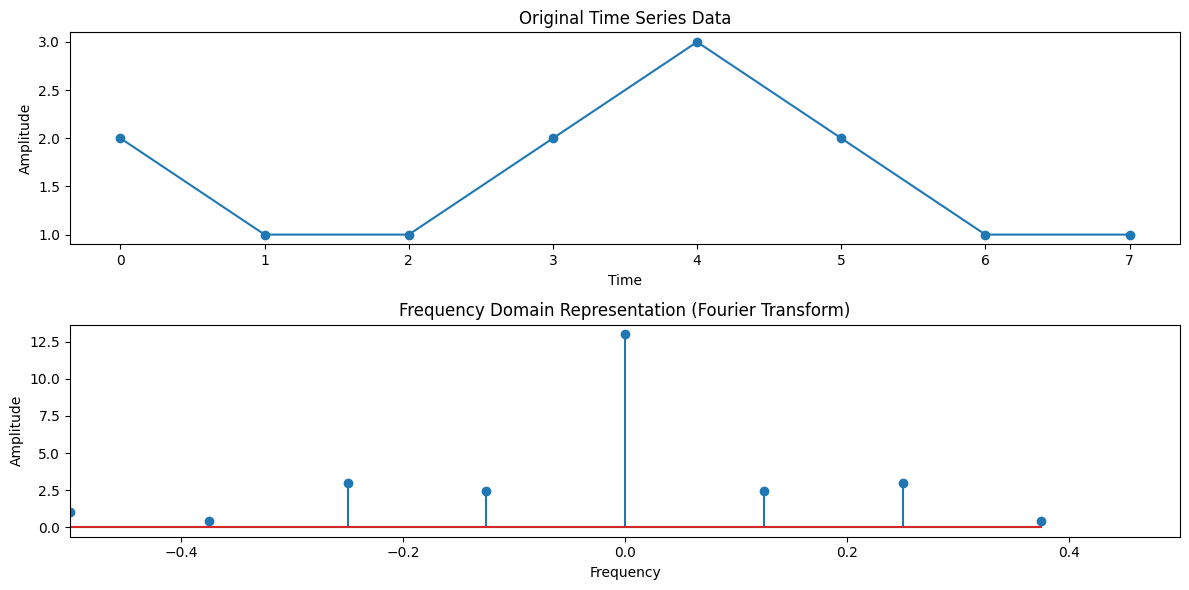

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample time series data
time_series_data = np.array([2.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 1.0])

# Perform Fourier Transform
fourier_transform = np.fft.fft(time_series_data)
frequencies = np.fft.fftfreq(len(fourier_transform))

# Extract features
magnitude_spectrum = np.abs(fourier_transform)
phase_spectrum = np.angle(fourier_transform)

# Feature extraction
median_frequency = np.median(np.abs(frequencies))
std_magnitude = np.std(magnitude_spectrum)
amplitude = np.max(magnitude_spectrum)
dominant_frequency = np.abs(frequencies[np.argmax(magnitude_spectrum)])
dominant_phase = phase_spectrum[np.argmax(magnitude_spectrum)]

# Display extracted features
print(f"Median Frequency: {median_frequency}")
print(f"Standard Deviation of Magnitude Spectrum: {std_magnitude}")
print(f"Amplitude: {amplitude}")
print(f"Dominant Frequency: {dominant_frequency}")
print(f"Dominant Phase: {dominant_phase}")

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_series_data, marker='o')
plt.title('Original Time Series Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the frequency domain representation
plt.subplot(2, 1, 2)
plt.stem(frequencies, magnitude_spectrum)
plt.title('Frequency Domain Representation (Fourier Transform)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(-0.5, 0.5)  # Show frequencies in the range [-0.5, 0.5] for real-valued signals

plt.tight_layout()
plt.show()


In [11]:
magnitude_spectrum.shape

(8,)